In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()

In [2]:
data = pd.read_csv('../data/creditcard.csv')

In [3]:
data.columns, data.shape

(Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
        'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
        'Class'],
       dtype='object'), (284807, 31))

In [4]:
data.sample(n=3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
54340,46401.0,1.094611,-0.041712,-0.118973,1.049149,0.434768,0.829396,0.028475,0.180193,0.077897,...,-0.090381,-0.173097,-0.271313,-1.133013,0.773684,-0.263915,0.025086,0.004137,65.00,0
122886,76730.0,1.223822,-0.240063,1.006460,0.340395,-0.683402,0.495733,-0.939613,0.285608,0.874379,...,0.183104,0.620662,-0.094511,-0.723747,0.216489,0.661425,0.027835,0.017101,1.30,0
253462,156263.0,2.033799,-0.079436,-2.020481,0.155099,0.801086,-0.349901,0.450114,-0.220864,0.291319,...,0.027169,0.215922,-0.036945,0.232368,0.426329,-0.245323,-0.047700,-0.069813,29.99,0


In [5]:
data.Time.min(), data.Time.max()

(0.0, 172792.0)

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
data = data.sort_values(by='Time')

In [8]:
tmp = np.array(data.Amount)

from sklearn.preprocessing import StandardScaler

tmp = StandardScaler().fit_transform(tmp.reshape(-1,1))

In [9]:
data['Amount']=tmp

In [10]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [11]:
l = int(data.shape[0]*0.8)

train_data = data[:l]
test_data = data[l:]

In [12]:
train_data.shape, test_data.shape

((227845, 31), (56962, 31))

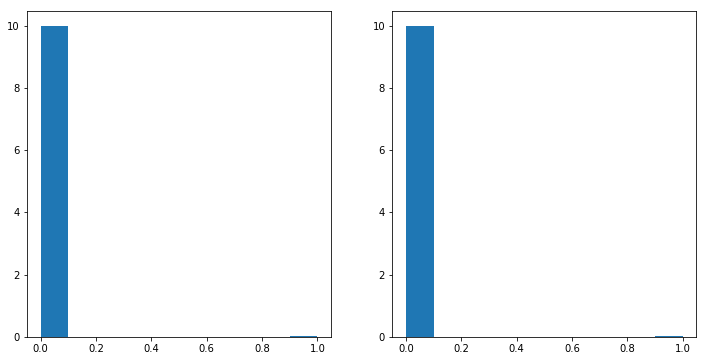

In [13]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(train_data.Class,normed=True)
plt.subplot(1,2,2)
plt.hist(test_data.Class,normed=True)
plt.show()